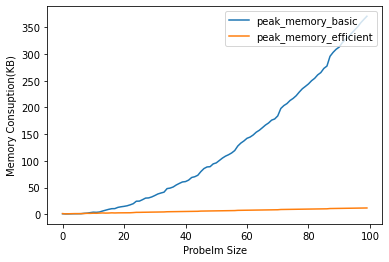

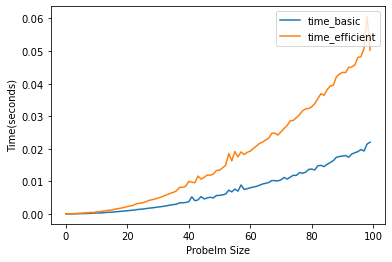

In [1]:
from basic import SequenceAlignmentBasic
from efficient import SequenceAlignmentEfficient
from utils import compute_cost_bio_stat, compute_cost, generate_random_sequence

import tracemalloc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ITERATIONS = 100
SAMPLING_ITERATIONS = 10

ALPHA =  {'A': {'A':0,'C':110,'G':48,'T':94},
          'C': {'A':110,'C':0,'G':118,'T':48},
          'G':  {'A':48,'C':118,'G':0,'T':110},
          'T': {'A':94,'C':48,'G':110,'T':0}
          }

DELTA = 30

def generate_X_and_Y(size):
    return (generate_random_sequence(size), generate_random_sequence(size))


def run_basic(X,Y):
    sequence_alignment = SequenceAlignmentBasic(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def run_efficient(X,Y):
    sequence_alignment = SequenceAlignmentEfficient(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def stats_basic(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_basic(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.mean(time_list), np.mean(current_memory_list),np.mean(peak_memory_list)
        
def stats_efficient(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_efficient(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.mean(time_list), np.mean(current_memory_list),np.mean(peak_memory_list)

def generate_graphs():

    time_comp = []
    memory_comp = []
    x_val = []
    
    for i in range(1,ITERATIONS+1):
        X,Y = generate_X_and_Y(i)
        time_basic, curr_memory_basic , peak_memory_basic = stats_basic(X,Y)
        time_efficient, curr_memory_efficient , peak_memory_efficient = stats_efficient(X,Y)
        time_comp.append([time_basic,time_efficient])
        memory_comp.append([peak_memory_basic,peak_memory_efficient])

    time_comp_df = pd.DataFrame(time_comp, columns=['time_basic','time_efficient'])
    memory_comp_df = pd.DataFrame(memory_comp, columns=['peak_memory_basic','peak_memory_efficient'])
    
    plt.plot(memory_comp_df["peak_memory_basic"], label = 'peak_memory_basic')
    plt.plot(memory_comp_df["peak_memory_efficient"], label = 'peak_memory_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Memory Consuption(KB)')
    plt.savefig('MemoryPlot.png',dpi=300)

    plt.show()

    plt.plot(time_comp_df["time_basic"], label = 'time_basic')
    plt.plot(time_comp_df["time_efficient"], label = 'time_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Time(seconds)')
    plt.savefig('CPUPlot.png',dpi=300)
    plt.show()
    

    return time_comp_df, memory_comp_df
    
time_comp_df, memory_comp_df = generate_graphs()


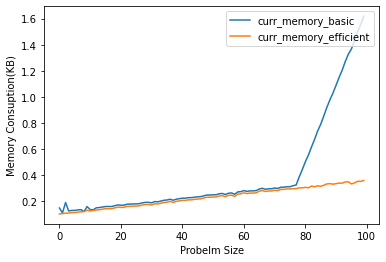

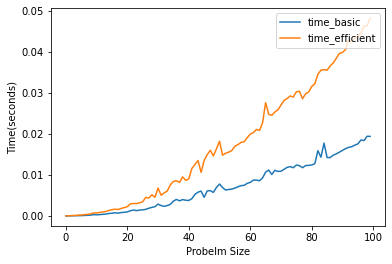

In [2]:
from basic import SequenceAlignmentBasic
from efficient import SequenceAlignmentEfficient
from utils import compute_cost_bio_stat, compute_cost, generate_random_sequence

import tracemalloc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ITERATIONS = 100
SAMPLING_ITERATIONS = 10

ALPHA =  {'A': {'A':0,'C':110,'G':48,'T':94},
          'C': {'A':110,'C':0,'G':118,'T':48},
          'G':  {'A':48,'C':118,'G':0,'T':110},
          'T': {'A':94,'C':48,'G':110,'T':0}
          }

DELTA = 30

def generate_X_and_Y(size):
    return (generate_random_sequence(size), generate_random_sequence(size))


def run_basic(X,Y):
    sequence_alignment = SequenceAlignmentBasic(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def run_efficient(X,Y):
    sequence_alignment = SequenceAlignmentEfficient(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def stats_basic(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_basic(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.mean(time_list), np.mean(current_memory_list),np.mean(peak_memory_list)
        
def stats_efficient(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_efficient(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.median(time_list), np.median(current_memory_list),np.median(peak_memory_list)

def generate_graphs():

    time_comp = []
    memory_comp = []
    
    for i in range(1,ITERATIONS+1):
        X,Y = generate_X_and_Y(i)
        time_basic, curr_memory_basic , peak_memory_basic = stats_basic(X,Y)
        time_efficient, curr_memory_efficient , peak_memory_efficient = stats_efficient(X,Y)
        time_comp.append([time_basic,time_efficient])
        memory_comp.append([curr_memory_basic,curr_memory_efficient])

    time_comp_df = pd.DataFrame(time_comp, columns=['time_basic','time_efficient'])
    memory_comp_df = pd.DataFrame(memory_comp, columns=['curr_memory_basic','curr_memory_efficient'])
    
    plt.plot(memory_comp_df["curr_memory_basic"], label = 'curr_memory_basic')
    plt.plot(memory_comp_df["curr_memory_efficient"], label = 'curr_memory_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Memory Consuption(KB)')
    plt.savefig('MemoryPlot.png',dpi=300)

    plt.show()

    plt.plot(time_comp_df["time_basic"], label = 'time_basic')
    plt.plot(time_comp_df["time_efficient"], label = 'time_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Time(seconds)')
    plt.savefig('CPUPlot.png',dpi=300)
    plt.show()
    

    return time_comp_df, memory_comp_df
    
time_comp_df, memory_comp_df = generate_graphs()



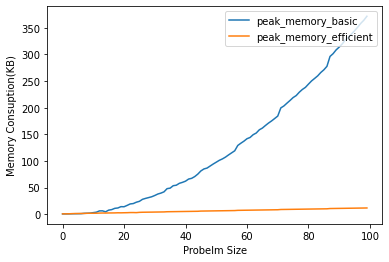

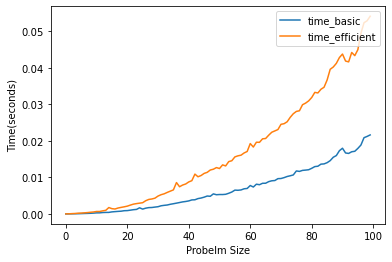

In [3]:
from basic import SequenceAlignmentBasic
from efficient import SequenceAlignmentEfficient
from utils import compute_cost_bio_stat, compute_cost, generate_random_sequence

import tracemalloc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ITERATIONS = 100
SAMPLING_ITERATIONS = 10

ALPHA =  {'A': {'A':0,'C':110,'G':48,'T':94},
          'C': {'A':110,'C':0,'G':118,'T':48},
          'G':  {'A':48,'C':118,'G':0,'T':110},
          'T': {'A':94,'C':48,'G':110,'T':0}
          }

DELTA = 30

def generate_X_and_Y(size):
    return (generate_random_sequence(size), generate_random_sequence(size))


def run_basic(X,Y):
    sequence_alignment = SequenceAlignmentBasic(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def run_efficient(X,Y):
    sequence_alignment = SequenceAlignmentEfficient(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def stats_basic(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_basic(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.median(time_list), np.median(current_memory_list),np.median(peak_memory_list)
        
def stats_efficient(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_efficient(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.median(time_list), np.median(current_memory_list),np.median(peak_memory_list)

def generate_graphs():

    time_comp = []
    memory_comp = []
    x_val = []
    
    for i in range(1,ITERATIONS+1):
        X,Y = generate_X_and_Y(i)
        time_basic, curr_memory_basic , peak_memory_basic = stats_basic(X,Y)
        time_efficient, curr_memory_efficient , peak_memory_efficient = stats_efficient(X,Y)
        time_comp.append([time_basic,time_efficient])
        memory_comp.append([peak_memory_basic,peak_memory_efficient])

    time_comp_df = pd.DataFrame(time_comp, columns=['time_basic','time_efficient'])
    memory_comp_df = pd.DataFrame(memory_comp, columns=['peak_memory_basic','peak_memory_efficient'])
    
    plt.plot(memory_comp_df["peak_memory_basic"], label = 'peak_memory_basic')
    plt.plot(memory_comp_df["peak_memory_efficient"], label = 'peak_memory_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Memory Consuption(KB)')
    plt.savefig('MemoryPlot.png',dpi=300)

    plt.show()

    plt.plot(time_comp_df["time_basic"], label = 'time_basic')
    plt.plot(time_comp_df["time_efficient"], label = 'time_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Time(seconds)')
    plt.savefig('CPUPlot.png',dpi=300)
    plt.show()
    

    return time_comp_df, memory_comp_df
    
time_comp_df, memory_comp_df = generate_graphs()



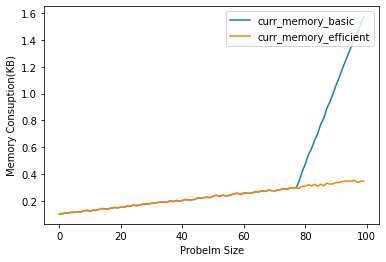

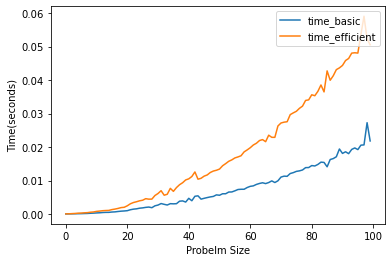

In [4]:
from basic import SequenceAlignmentBasic
from efficient import SequenceAlignmentEfficient
from utils import compute_cost_bio_stat, compute_cost, generate_random_sequence

import tracemalloc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ITERATIONS = 100
SAMPLING_ITERATIONS = 10

ALPHA =  {'A': {'A':0,'C':110,'G':48,'T':94},
          'C': {'A':110,'C':0,'G':118,'T':48},
          'G':  {'A':48,'C':118,'G':0,'T':110},
          'T': {'A':94,'C':48,'G':110,'T':0}
          }

DELTA = 30

def generate_X_and_Y(size):
    return (generate_random_sequence(size), generate_random_sequence(size))


def run_basic(X,Y):
    sequence_alignment = SequenceAlignmentBasic(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def run_efficient(X,Y):
    sequence_alignment = SequenceAlignmentEfficient(X,Y,ALPHA,DELTA)
    cost_dp = sequence_alignment.calculate_alignment_cost()
    return sequence_alignment.find_alignment()

def stats_basic(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_basic(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.median(time_list), np.median(current_memory_list),np.median(peak_memory_list)
        
def stats_efficient(X,Y):
    time_list = []
    current_memory_list = []
    peak_memory_list = []
    
    for i in range(SAMPLING_ITERATIONS):
        tracemalloc.start()
        start_time = time.time()
        basic_pass, efficient_pass = run_efficient(X,Y)
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time_list.append(time.time()-start_time)
        current_memory_list.append(current_memory / 10**3)
        peak_memory_list.append(peak_memory / 10**3)
    
    return np.median(time_list), np.median(current_memory_list),np.median(peak_memory_list)

def generate_graphs():

    time_comp = []
    memory_comp = []
    
    for i in range(1,ITERATIONS+1):
        X,Y = generate_X_and_Y(i)
        time_basic, curr_memory_basic , peak_memory_basic = stats_basic(X,Y)
        time_efficient, curr_memory_efficient , peak_memory_efficient = stats_efficient(X,Y)
        time_comp.append([time_basic,time_efficient])
        memory_comp.append([curr_memory_basic,curr_memory_efficient])

    time_comp_df = pd.DataFrame(time_comp, columns=['time_basic','time_efficient'])
    memory_comp_df = pd.DataFrame(memory_comp, columns=['curr_memory_basic','curr_memory_efficient'])
    
    plt.plot(memory_comp_df["curr_memory_basic"], label = 'curr_memory_basic')
    plt.plot(memory_comp_df["curr_memory_efficient"], label = 'curr_memory_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Memory Consuption(KB)')
    plt.savefig('MemoryPlot.png',dpi=300)

    plt.show()

    plt.plot(time_comp_df["time_basic"], label = 'time_basic')
    plt.plot(time_comp_df["time_efficient"], label = 'time_efficient')
    plt.legend(loc="upper right")
    plt.xlabel('Probelm Size')
    plt.ylabel('Time(seconds)')
    plt.savefig('CPUPlot.png',dpi=300)
    plt.show()
    

    return time_comp_df, memory_comp_df
    
time_comp_df, memory_comp_df = generate_graphs()

